# Aggregated results

In [1]:
import os
import pandas as pd
import numpy as np

#Developed libraries for working with simulation results
import plots.saturated_steady_state as sssp
import analyses.transient as translys
from data_reader import data_processing as proc

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Parent directories

In [2]:
results_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
output_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
raw_dir = "X:/Richards_flow/RF_big_sat_2"

## Reactive species: Aggregated results: Change in mass flux

- Aggregated results can be visualized as:
 - Change in mass flux in the domain normalized by that in the base case
 - Change in flux averaged concentrations between inlet and outlet normalized by that in the base case

### Import data and explore values

In [3]:
filename = "concdata_with_sat_26092021.csv"#03082021.csv"#"massflux_02052021.csv"#"concdata_02052021.csv"
mfdata = pd.read_csv(os.path.join(results_dir, filename))
print(mfdata.shape)
print(mfdata.columns)
filename = "conc_comparison_with_sat_26092021.csv"#03082021.csv"#"massflux_comparison_02052021.csv"#"conc_comparison_02052021.csv"
mfdata_comparison = pd.read_csv(os.path.join(results_dir, filename))
print(mfdata_comparison.shape)
print(mfdata_comparison.columns)

(882, 13)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'conc_in',
       'conc_out', 'delconc', 'reldelconc', 'normconc', 'Mean_saturation',
       'Time', 'fraction'],
      dtype='object')
(882, 18)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'conc_in',
       'conc_out', 'delconc', 'reldelconc', 'normconc', 'Mean_saturation',
       'Time', 'fraction', 'spatial_normconc_base', 'spatial_reldelconc_base',
       'normconc_spatial_fraction', 'reldelconc_spatial_fraction', 'Da63'],
      dtype='object')


In [4]:
# How many regimes and what are they called? Which chemical species?
print(mfdata.Regime.unique())
print(mfdata.Chem.unique())
print(mfdata_comparison.Regime.unique())
print(mfdata_comparison.Chem.unique())
print(mfdata_comparison.reldelconc_spatial_fraction.min())

['Medium' 'Fast' 'Slow']
['DOC' 'DO' 'Nitrate' 'Ammonium' 'Nitrogen' 'TOC']
['Medium' 'Fast' 'Slow']
['DOC' 'DO' 'Nitrate' 'Ammonium' 'Nitrogen' 'TOC']
-1.0380550063730074


### Base case removal

In [5]:
datah = mfdata[mfdata.Trial=='H']
datah_wodo = datah[datah.Chem!='DO']

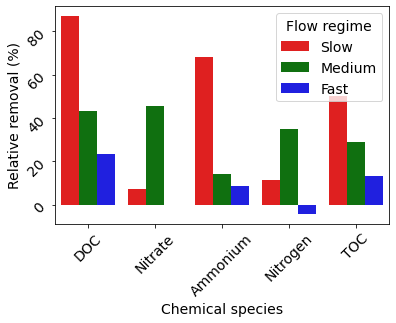

In [7]:
sns.set_palette("muted",3)
my_pal = {"Slow": "r", "Medium": "g", "Fast":"b"}
sns.barplot(data = datah_wodo, y = "reldelconc", x= "Chem", hue ="Regime", hue_order = ["Slow", "Medium", "Fast"], palette = my_pal)
plt.xlabel ("Chemical species", fontsize = 14)
plt.ylabel ("Relative removal (%)", fontsize = 14)
plt.tick_params(labelsize = 14, rotation = 45)
plt.legend(title = 'Flow regime', fontsize = 14, title_fontsize = 14)

### Scatter plot of removal of reactive species in each domain with change in breakthrough time

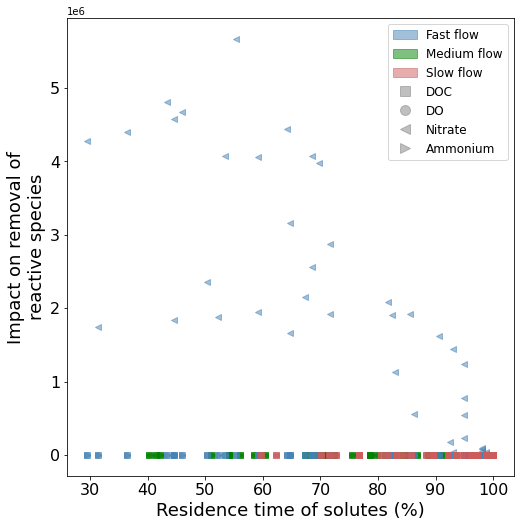

In [7]:
#Defining base parameters for figures
grey_dot = mlines.Line2D([], [], linestyle = '', marker = "o", markerfacecolor = "grey", markeredgecolor = "grey", markersize=10, label='DO', alpha = 0.5)
grey_triangle = mlines.Line2D([], [], linestyle = '', marker = "^", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='Nitrogen', alpha = 0.5)
grey_square = mlines.Line2D([], [], linestyle = '', marker = "s", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='DOC', alpha = 0.5)
empty_square = mlines.Line2D([], [], linestyle = '', marker = "d", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='TOC', alpha = 0.5)
empty_triangle = mlines.Line2D([], [], linestyle = '', marker = "<", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='Nitrate', alpha = 0.5)
empty_diamond = mlines.Line2D([], [], linestyle = '', marker = ">", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='Ammonium', alpha = 0.5)
my_pal = {3:"indianred", 2: "g", 0:"steelblue", 1 :"orange",
          "Slow":"indianred", "Medium": "g", "Fast":"steelblue"}
blue_patch = mpatches.Patch(color="steelblue", label= "Fast flow", alpha = 0.5)
green_patch = mpatches.Patch(color="g", label="Medium flow", alpha = 0.5)
red_patch = mpatches.Patch(color="indianred", label="Slow flow", alpha = 0.5)
#patchlist = [blue_patch, green_patch, red_patch, grey_square, empty_square, grey_dot, grey_triangle, empty_triangle, empty_diamond]
patchlist = [blue_patch, green_patch, red_patch, grey_square, grey_dot, empty_triangle, empty_diamond]
regimes = ["Slow", "Medium", "Fast"]
mymarklist = {'DOC': 's', 'TOC' : 'd', 'DO': 'o', 'Nitrogen': '^', 'Ammonium' : '>', 'Nitrate':'<'}

#Plotting
finaldata = mfdata_comparison
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize=(8,8))
for r in regimes:
    subset = finaldata[finaldata.Regime==r]
    for g in ["DO", "DOC", "Nitrate", "Ammonium"]:
        data = subset[subset.Chem==g]
        #plt.scatter(data["fraction"]*100, 100*data['normmassflux_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        plt.scatter(data["fraction"]*100, 100*data['reldelconc_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
#plt.yscale("log")
#plt.yticks((40,100,300,600), (40,100,300,600))
plt.tick_params(labelsize = 16)
plt.legend(handles = patchlist, fontsize = 12)
plt.xlabel ("Residence time of solutes (%)", fontsize = 18)
plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#plt.savefig(os.path.join(output_dir, "removal_impact.pdf"), bbox_inches = 'tight', pad_inches = 0.1)

### Scatter plot of removal of reactive species in each domain with change in breakthrough time
- Nitrogen and TOC

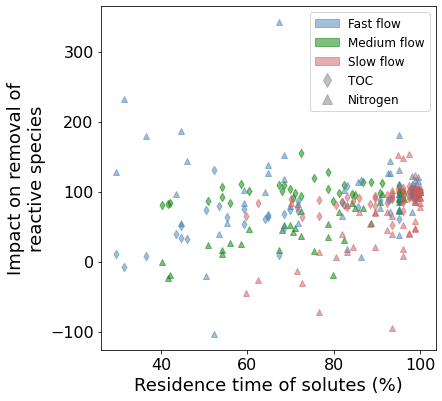

In [9]:
patchlist = [blue_patch, green_patch, red_patch, empty_square, grey_triangle]
#Plotting
finaldata = mfdata_comparison
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize = (6,6))
for r in regimes:
    subset = finaldata[finaldata.Regime==r]
    for g in ["TOC", "Nitrogen"]:
        data = subset[subset.Chem==g]
        #plt.scatter(data["fraction"]*100, 100*data['reldelmassflux_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        plt.scatter(data["fraction"]*100, 100*data['reldelconc_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
#plt.yscale("log")
#plt.yticks((40,100,300,600), (40,100,300,600))
plt.tick_params(labelsize = 16)
plt.legend(handles = patchlist, fontsize = 12)
plt.xlabel ("Residence time of solutes (%)", fontsize = 18)
plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#plt.savefig(os.path.join(output_dir, "removal_impact.pdf"), bbox_inches = 'tight', pad_inches = 0.1)

### Aggregated results: Change in concentration of species: Takeaways

- Slow flow regime is not impacted by spatial heterogeneity
- Medium flow regime:
    - No impact on DO removal
    - DOC, nitrate and ammonium removal decreases with increasing heterogeneity
    - TOC is driven by the same dynamics as DOC.
- Fast flow regime:
    - DO, DOC, Ammonium removal decreases with increasing heterogeneity
    - Nitrate removal increases with heterogeneity
    - TOC removal increases - pointing to increasing export of POM/mobile microbial biomass (?) - **WIP**
    - Nitrogen removal (including POM and mobile biomass) removal is higher in the homogeneous domain. So the impact appears as negative (?). The concentration of nitrogen in the inlet is lower than that in the other scenarios while the concentration at the outlet is comparable. This is potentially a calculation mistake. - **WIP**
    
**Similar outputs are obtained if we plot impact on change in mass flux in the domain**

## Aggregated results: Biomass

### Import data and explore values

In [4]:
filename = "biomass_03082021.csv"
mfdata = pd.read_csv(os.path.join(results_dir, filename))
print(mfdata.shape)
print(mfdata.columns)
filename = "biomass_comparison_03082021.csv"
allbiomassdata = pd.read_csv(os.path.join(results_dir, filename))
print(allbiomassdata.shape)
print(allbiomassdata.columns)

(2352, 10)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Mean_saturation', 'Time', 'fraction'],
      dtype='object')
(2352, 14)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Mean_saturation', 'Time', 'fraction',
       'spatial_biomass_base', 'spatial_biomass_contribution_base',
       'biomass_spatial_fraction', 'biomass_contribution_spatial_fraction'],
      dtype='object')


In [5]:
# How many regimes and what are they called? Which chemical species?
print(mfdata.Regime.unique())
print(mfdata.Chem.unique())
print(allbiomassdata.Regime.unique())
print(allbiomassdata.Chem.unique())

['Medium' 'Fast' 'Slow']
['Immobile active aerobic degraders' 'Immobile active nitrate reducers'
 'Immobile active sulphate reducers' 'Immobile active ammonia oxidizers'
 'Mobile active aerobic degraders' 'Mobile active nitrate reducers'
 'Mobile active sulphate reducers' 'Mobile active ammonia oxidizers'
 'Immobile inactive aerobic degraders'
 'Immobile inactive nitrate reducers'
 'Immobile inactive sulphate reducers'
 'Immobile inactive ammonia oxidizers' 'Mobile inactive aerobic degraders'
 'Mobile inactive nitrate reducers' 'Mobile inactive sulphate reducers'
 'Mobile inactive ammonia oxidizers']
['Medium' 'Fast' 'Slow']
['Immobile active aerobic degraders' 'Immobile active nitrate reducers'
 'Immobile active sulphate reducers' 'Immobile active ammonia oxidizers'
 'Mobile active aerobic degraders' 'Mobile active nitrate reducers'
 'Mobile active sulphate reducers' 'Mobile active ammonia oxidizers'
 'Immobile inactive aerobic degraders'
 'Immobile inactive nitrate reducers'
 'Immobi

## Aggregate results: Biomass: Overall distribution between different fractions of microbial biomass



### Explore fractions between active immobile, active mobile, inactive immobile and inactive mobile biomass
### Base case

In [9]:
#Reactive species of concerns
States = ["Active", "Inactive"]
Locations = ["Mobile", "Immobile"]
allspecies = proc.speciesdict("Unsaturated")
microbialspecies = list(t for t in allspecies.keys() if allspecies[t]["State"] in States)
print(allbiomassdata.columns)
allbiomassdata['Regime'] = allbiomassdata['Regime'].replace({'Equal':'Medium'})
biomassdata = allbiomassdata
uniquespecies = biomassdata.Chem.unique().tolist()
for s in uniquespecies:
    biomassdata.loc[biomassdata.Chem == s, 'State'] = allspecies[s]["State"]
    biomassdata.loc[biomassdata.Chem == s, 'Location'] = allspecies[s]['Location']
col_dit = {'Slow':'indianred', 'Medium':'g', 'Fast':'steelblue'}
regimes = ["Slow","Medium","Fast"]
data = biomassdata[biomassdata.Trial=='H']

Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Mean_saturation', 'Time', 'fraction',
       'spatial_biomass_base', 'spatial_biomass_contribution_base',
       'biomass_spatial_fraction', 'biomass_contribution_spatial_fraction',
       'State', 'Location'],
      dtype='object')


In [28]:
### Try heatmap
### Convert dataframe to 2D - regimes in columns and chem in rows, and Biomass_contribution in cells
data['Biomass_contribution%'] = np.round(data.Biomass_contribution*100,0).astype(int)
select = data[['Regime','Chem','Biomass_contribution%']]
select_p = select.pivot(index = 'Chem', columns = 'Regime', values = 'Biomass_contribution%')
print(select_p)

Regime                               Fast  Medium  Slow
Chem                                                   
Immobile active aerobic degraders      81      21    13
Immobile active ammonia oxidizers       2       3     1
Immobile active nitrate reducers        0      14     1
Immobile active sulphate reducers       0       0     0
Immobile inactive aerobic degraders     0      35    48
Immobile inactive ammonia oxidizers     0       0     0
Immobile inactive nitrate reducers      4       4     6
Immobile inactive sulphate reducers     2       3     2
Mobile active aerobic degraders         7       5     5
Mobile active ammonia oxidizers         1       1     1
Mobile active nitrate reducers          0       3     0
Mobile active sulphate reducers         0       0     0
Mobile inactive aerobic degraders       0       9    21
Mobile inactive ammonia oxidizers       0       0     0
Mobile inactive nitrate reducers        1       1     2
Mobile inactive sulphate reducers       1       

<ipython-input-28-8603d638e2d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Biomass_contribution%'] = np.round(data.Biomass_contribution*100,0).astype(int)


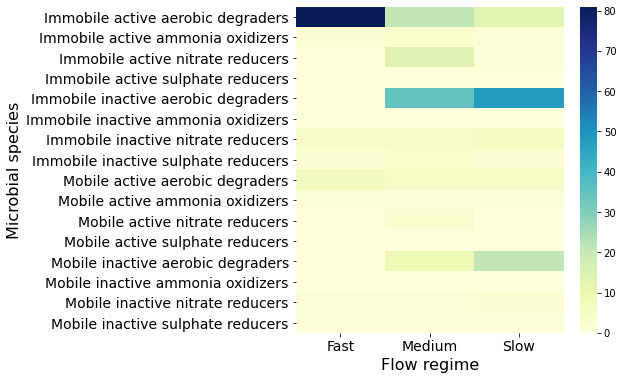

In [26]:
plt.figure(figsize=(6,6))
sns.heatmap(select_p, cmap="YlGnBu")
plt.xlabel("Flow regime", fontsize = 16)
plt.ylabel("Microbial species", fontsize = 16)
plt.tick_params(labelsize = 14)
plt.show()

### Explore fractions between active immobile, active mobile, inactive immobile and inactive mobile biomass
### with increasing spatial heterogeneity

Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Mean_saturation', 'Time', 'fraction',
       'spatial_biomass_base', 'spatial_biomass_contribution_base',
       'biomass_spatial_fraction', 'biomass_contribution_spatial_fraction'],
      dtype='object')
['Immobile active aerobic degraders', 'Immobile active nitrate reducers', 'Immobile active ammonia oxidizers', 'Mobile active aerobic degraders', 'Mobile active nitrate reducers', 'Mobile active ammonia oxidizers', 'Immobile inactive aerobic degraders', 'Immobile inactive nitrate reducers', 'Immobile inactive ammonia oxidizers', 'Mobile inactive aerobic degraders', 'Mobile inactive nitrate reducers', 'Mobile inactive ammonia oxidizers']


Text(0, 0.5, 'Contribution to total biomass (%)')

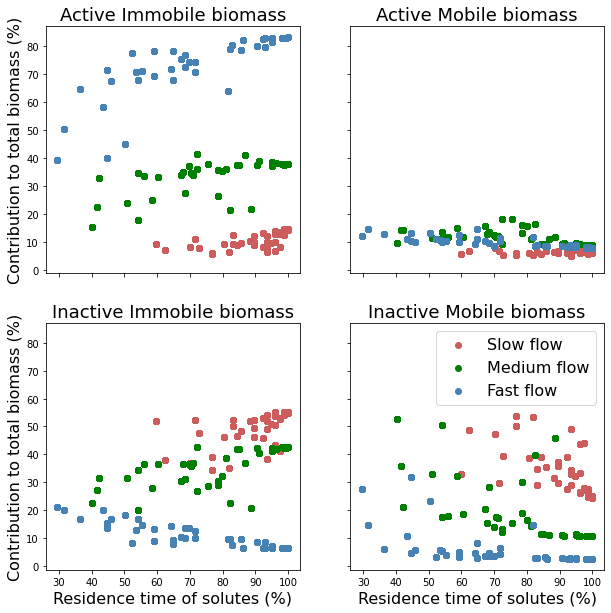

In [12]:
#Reactive species of concerns
States = ["Active", "Inactive"]
Locations = ["Mobile", "Immobile"]
allspecies = proc.speciesdict("Unsaturated")
microbialspecies = list(t for t in allspecies.keys() if allspecies[t]["State"] in States)
print(allbiomassdata.columns)
allbiomassdata['Regime'] = allbiomassdata['Regime'].replace({'Equal':'Medium'})
biomassdata = allbiomassdata
uniquespecies = biomassdata.Chem.unique().tolist()
for s in uniquespecies:
    biomassdata.loc[biomassdata.Chem == s, 'State'] = allspecies[s]["State"]
    biomassdata.loc[biomassdata.Chem == s, 'Location'] = allspecies[s]['Location']
col_dit = {'Slow':'indianred', 'Medium':'g', 'Fast':'steelblue'}
uniquespecies.remove('Immobile active sulphate reducers')
uniquespecies.remove('Immobile inactive sulphate reducers')
uniquespecies.remove('Mobile active sulphate reducers')
uniquespecies.remove('Mobile inactive sulphate reducers')
print(uniquespecies)
x = biomassdata.groupby(['Regime','Trial','State', 'Location'], as_index=False)['Biomass_contribution'].sum()
x = pd.merge(x, biomassdata[['Regime', 'Trial', 'Time', 'fraction']], on = ['Regime', 'Trial'])
fig, axeses = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
i = 0
for a in ["Active", "Inactive"]:
    for l in ["Immobile", "Mobile"]:
        subdata = x[(x.State == a) & (x.Location == l)]
        ax = axeses.flat[i]
        ax.set_title(a + " " + l + " biomass", fontsize = 18)
        for r in ["Slow", "Medium", "Fast"]:
            data = subdata[subdata.Regime == r]
            ax.scatter(100*data.fraction, 100*data.Biomass_contribution, c = col_dit[r], label = r + " flow")
        i += 1
ax.legend(fontsize = 16)
axeses.flat[2].set_xlabel ("Residence time of solutes (%)", fontsize = 16)
axeses.flat[3].set_xlabel ("Residence time of solutes (%)", fontsize = 16)
axeses.flat[0].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
axeses.flat[2].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
#plt.savefig(os.path.join(data_dir, "FigureS9_contribution_state_location_biomass.png"), dpi = 300)

### Takeaways

- Active immobile biomass contributes the highest to the total biomass in the fast flow regime. It decreases with increasing heterogeneity. The rate of reduction varies with the flow regime. The rate of reduction is the highest in the fast flow regime. Then in the medium flow regime, and there is almost no impact in the slow flow regime.
- *Minimal impact of heterogeneity and flow regime on active mobile biomass.*
- Inactive immobile biomass contributes the lowest in the fast flow regime (compared to the other flow regimes). Its contribution increases with spatial heterogeneity in the fast flow regime. The contribution of this fraction in medium and slow flow regimes is not affected by spatial heterogeneity.
- Inactive mobile biomass contributes the most to the total biomass in the slow flow regime (compared to other flow regimes). Inactive mobile biomass increases with spatial heterogeneity in all flow regimes, at seemingly the same rate (visual observation).
- Spatial heterogenetiy results in a shift from active immobile biomass to inactive immobile biomass in the fast flow regime, and inactive mobile biomass in the slow and medium flow regimes.

### Explore fractionation according to microbial species

Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Mean_saturation', 'Time', 'fraction',
       'spatial_biomass_base', 'spatial_biomass_contribution_base',
       'biomass_spatial_fraction', 'biomass_contribution_spatial_fraction',
       'State', 'Location'],
      dtype='object')
['Immobile active aerobic degraders', 'Immobile active nitrate reducers', 'Immobile active ammonia oxidizers', 'Mobile active aerobic degraders', 'Mobile active nitrate reducers', 'Mobile active ammonia oxidizers', 'Immobile inactive aerobic degraders', 'Immobile inactive nitrate reducers', 'Immobile inactive ammonia oxidizers', 'Mobile inactive aerobic degraders', 'Mobile inactive nitrate reducers', 'Mobile inactive ammonia oxidizers']


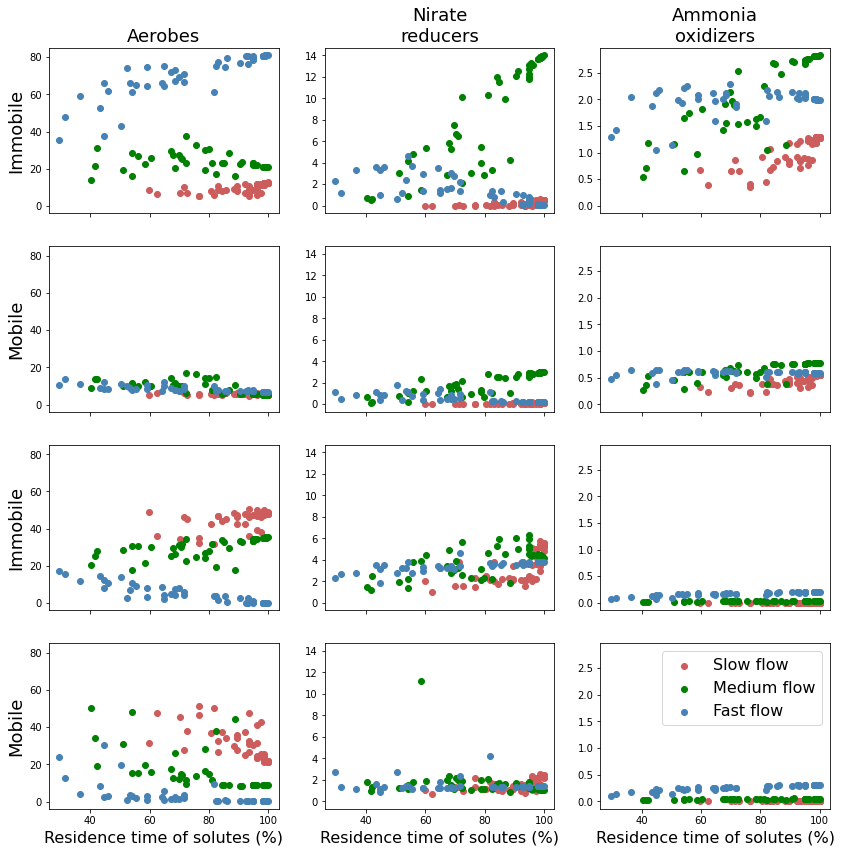

In [13]:
#Reactive species of concerns
States = ["Active", "Inactive"]
Locations = ["Mobile", "Immobile"]
allspecies = proc.speciesdict("Unsaturated")
microbialspecies = list(t for t in allspecies.keys() if allspecies[t]["State"] in States)
print(allbiomassdata.columns)
allbiomassdata['Regime'] = allbiomassdata['Regime'].replace({'Equal':'Medium'})
biomassdata = allbiomassdata
uniquespecies = biomassdata.Chem.unique().tolist()
for s in uniquespecies:
    biomassdata.loc[biomassdata.Chem == s, 'State'] = allspecies[s]["State"]
    biomassdata.loc[biomassdata.Chem == s, 'Location'] = allspecies[s]['Location']
col_dit = {'Slow':'indianred', 'Medium':'g', 'Fast':'steelblue'}
uniquespecies.remove('Immobile active sulphate reducers')
uniquespecies.remove('Immobile inactive sulphate reducers')
uniquespecies.remove('Mobile active sulphate reducers')
uniquespecies.remove('Mobile inactive sulphate reducers')
column_headers = ["Aerobes", "Nirate\nreducers", "Ammonia\noxidizers"]
left_row = ["Immobile", "Mobile", "Immobile", "Mobile"]
right_row = ["Active", "Active", "Inactive", "Inactive"]
print(uniquespecies)
#x = biomassdata.groupby(['Regime','Trial','State', 'Location'], as_index=False)['Biomass_contribution'].sum()
#x = pd.merge(x, biomassdata[['Regime', 'Trial', 'Time', 'fraction']], on = ['Regime', 'Trial'])
fig, axeses = plt.subplots(4,3, sharex = True, sharey = 'col', figsize = (14,14))
i = 0
#for a in ["Active", "Inactive"]:
#    for l in ["Immobile", "Mobile"]:
for g in uniquespecies:
    subdata = biomassdata[biomassdata.Chem == g]
    ax = axeses.flat[uniquespecies.index(g)]
    if uniquespecies.index(g)<3:
        ax.set_title(column_headers[uniquespecies.index(g)], fontsize = 18)
    if uniquespecies.index(g)%3==0:
        ax.set_ylabel(left_row[int(uniquespecies.index(g)/3)], fontsize = 18)
    for r in ["Slow", "Medium", "Fast"]:
        data = subdata[subdata.Regime == r]
        ax.scatter(100*data.fraction, 100*data.Biomass_contribution, c = col_dit[r], label = r + " flow")
ax.legend(fontsize = 16)
for ax in axeses[-1,:]:
    ax.set_xlabel ("Residence time of solutes (%)", fontsize = 16)
#axeses.flat[3].set_xlabel ("Residence time of solutes (%)", fontsize = 16)
#axeses.flat[0].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
#axeses.flat[2].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
#plt.savefig(os.path.join(data_dir, "FigureS9_contribution_state_location_biomass.png"), dpi = 300)

### Takeaways

- Fast flow regime
 - The reduction in active immobile biomass with spatial heterogeneity is attributable to reduction in active immobile aerobes. The reduced active biomass mostly shifts to the inactive fractions.
 - In contrast, active immobile nitrate reducers increase with spatial heterogeneity. while the inactive fractions remain mostly constant. This points to an overall increase in contribution of nitrate reducers to the total biomass, with increased activity due to spatial heterogeneity.
 - No impact of spatial heterogeneity on ammonia oxidizers.

- Medium flow regime
 - Aerobes are not impacted by spatial heterogeneity barring a slight decrease in the contribution of immobile inactive fraction with increasing spatial heterogeneity. Possible that the overall biomass of aerobes is decreasing as the reduction in contribution of inactive immobile aerobes is not offset by an increase in contribution by other fractions.
 - Active immobile nitrate reducers decrease with increasing spatial heterogeneity, offset by both inactive immobile and mobile fractions. This makes sense since the aerobic zone expands a bit with increasing spatial heterogeneity leading to lower nitrate reduction friendly regions.
 - Ammonia oxidizers are not affected by spatial heterogeneity.

- Slow flow regime
 - Overall, slow flow regime is impacted the least by spatial heterogeneity.
 - The contribution of inactive immobile aerobes decreases with heterogeneity, and seemingly shifts to inactive immobile and mobile fractions of nitrate reducers.
 - Contribution of ammonia oxidizers is mostly the same regardless of spatial heterogeneity.

## Explore co-efficient of variation in each domain for each characteristic (but normalised?)

In [3]:
cv_file = "coeff_var.csv"
cvdata = pd.read_csv(os.path.join(results_dir, cv_file))
cvdata.head()

,Regime,Trial,Variance,Anisotropy,Chem,Mean,Sdev,Time,fraction,cv
0,Medium,H,0.0,1,DOC,476.997281,7.027524e+01,15.9,1.0,1.473284e-01
1,Medium,H,0.0,1,DO,12.280841,2.369187e+01,15.9,1.0,1.929173e+00
2,Medium,H,0.0,1,Ammonium,51.177117,1.855624e+00,15.9,1.0,3.625885e-02
3,Medium,H,0.0,1,Nitrate,191.436988,3.954246e+01,15.9,1.0,2.065560e-01
4,Medium,H,0.0,1,Sulphate,1500.000000,2.021553e-08,15.9,1.0,1.347702e-11


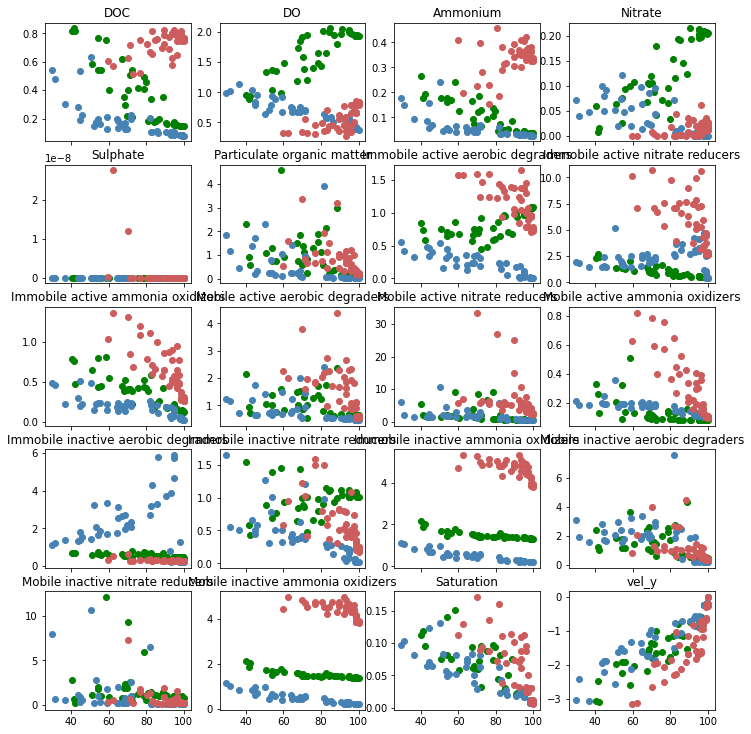

In [13]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
patchlist = [blue_patch, green_patch, red_patch, empty_square, grey_triangle]
#Plotting
finaldata = cvdata
gvarnames = finaldata.Chem.unique().tolist()
gvarnames.remove('Immobile active sulphate reducers')
gvarnames.remove('Immobile inactive sulphate reducers')
gvarnames.remove('Mobile active sulphate reducers')
gvarnames.remove('Mobile inactive sulphate reducers')
gvarnames.remove('Tracer')
gvarnames.remove('Tracer_study')
regimes = finaldata.Regime.unique().tolist()
fig, axes = plt.subplots(5,4, figsize = (12,12), sharex = True)#, sharey = True)
axes = trim_axs(axes, 20)
for g in gvarnames:
    ax_idx = axes.flat[gvarnames.index(g)]
    for r in regimes:
        subset = finaldata[finaldata.Regime==r]
        data = subset[subset.Chem==g]
        ax_idx.scatter(data["fraction"]*100, data['cv'], c = my_pal[r])#, marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        ax_idx.set_title(g)
#for ax in axes.flat[:]:
#    ax.set_ylim((-1,1))
#    ax.set_yscale('log')

#plt.yticks((40,100,300,600), (40,100,300,600))
#plt.tick_params(labelsize = 16)
#plt.legend(handles = patchlist, fontsize = 12)
#plt.xlabel ("Residence time of solutes (%)", fontsize = 18)
#plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")

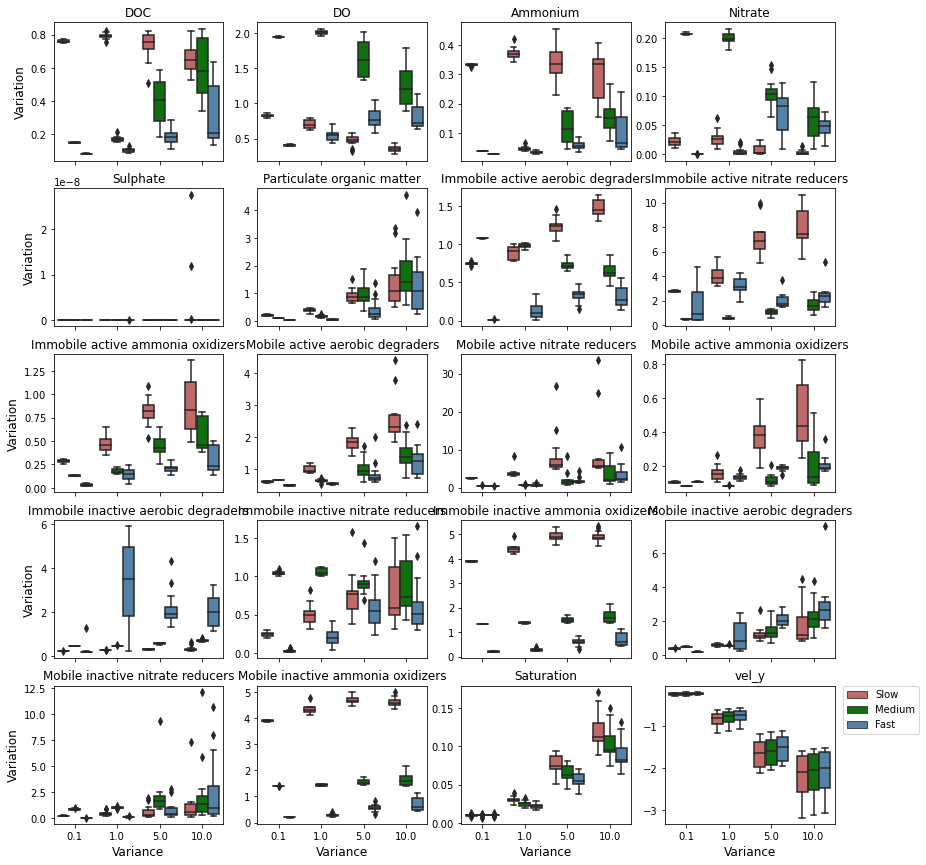

In [40]:
#sns.set_palette("muted",3)
#my_pal = {"Slow": "r", "Medium": "g", "Fast":"b"}
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
patchlist = [blue_patch, green_patch, red_patch, empty_square, grey_triangle]
#Plotting
finaldata = cvdata
gvarnames = finaldata.Chem.unique().tolist()
gvarnames.remove('Immobile active sulphate reducers')
gvarnames.remove('Immobile inactive sulphate reducers')
gvarnames.remove('Mobile active sulphate reducers')
gvarnames.remove('Mobile inactive sulphate reducers')
gvarnames.remove('Tracer')
gvarnames.remove('Tracer_study')
regimes = finaldata.Regime.unique().tolist()
fig, axes = plt.subplots(5,4, figsize = (14,14), sharex = True)#, sharey = True)
axes = trim_axs(axes, 20)
for g in gvarnames:
    ax_idx = axes.flat[gvarnames.index(g)]
    subdata = finaldata[(finaldata.Chem==g)&(finaldata.Trial!='H')]
    bxplot = sns.boxplot(x = 'Variance', y = 'cv', hue = 'Regime', hue_order = ["Slow", "Medium", "Fast"], palette = my_pal, 
                data = subdata, ax = ax_idx)
    bxplot.get_legend().remove()
    ax_idx.set_title(g, fontsize = 12)
for i in list(range(20)):
    if i in [0,4,8,12,16]:
        axes.flat[i].set_ylabel("Variation", fontsize = 12)
        #a.set_tickparams(labelsize = 16)
    else:
        axes.flat[i].set_ylabel("")
    if i in [16,17,18,19]:
        axes.flat[i].set_xlabel("Variance", fontsize = 12)
        #a.set_tickparams(labelsize=16)
    else:
        axes.flat[i].set_xlabel("") 
#plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
handles, labels = ax_idx.get_legend_handles_labels()
l = plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [49]:
chemdata = finaldata[finaldata.Chem=='DO']
chemdata.groupby(['Variance','Regime'])['Mean'].describe()

count        mean        std         min         25%  \
Variance Regime                                                         
0.0      Fast      1.0  141.008798        NaN  141.008798  141.008798   
         Medium    1.0   12.280841        NaN   12.280841   12.280841   
         Slow      1.0   72.081339        NaN   72.081339   72.081339   
0.1      Fast     12.0  139.184953   0.988064  137.551459  138.322224   
         Medium   12.0   12.366010   0.050695   12.275542   12.328502   
         Slow     12.0   76.906989   1.624986   74.130427   75.857532   
1.0      Fast     12.0  126.477271   6.525795  113.929359  122.157594   
         Medium   12.0   12.877575   0.281650   12.469950   12.636670   
         Slow     12.0  105.830024   8.780048   94.636420   98.565951   
5.0      Fast     12.0  101.377951  11.716224   81.756022   93.254434   
         Medium   12.0   25.231366  12.222722   13.291741   15.091617   
         Slow     12.0  163.614743  14.139863  142.297837  156.430202   
10.0     Fast     12.0  100.304815  16.845483   69.913261   87.179431   
         Medium   12.0   56.106027  33.252871   18.132033   27.802156   
         Slow     12.0  197.782287   9.255699  176.599970  193.616879   

                        50%         75%         max  
Variance Regime                                      
0.0      Fast    141.008798  141.008798  141.008798  
         Medium   12.280841   12.280841   12.280841  
         Slow     72.081339   72.081339   72.081339  
0.1      Fast    139.291434  140.078799  140.412226  
         Medium   12.369863   12.404367   12.446750  
         Slow     76.810721   77.529047   79.917262  
1.0      Fast    125.999301  130.329580  136.027756  
         Medium   12.923750   13.005666   13.354680  
         Slow    105.040216  113.254411  119.805619  
5.0      Fast    103.347255  110.796999  119.784569  
         Medium   21.387807   37.524159   47.167591  
         Slow    164.375369  169.965325  192.118015  
10.0     Fast    105.731084  110.645528  129.486395  
         Medium   45.246128   87.051137  102.244515  
         Slow    199.111596  202.843565  212.319957